<a href="https://colab.research.google.com/github/yooseungjun/ML/blob/main/05_%ED%8A%B8%EB%A6%AC_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**05-1 결정트리**
 

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head() #3개열 alcohol	sugar	pH	와인 class(0이면 레드 1이면 화이트)
wine.info() #각 열의 데이터타입과 누락된 데이터가 있는지 확인
wine.describe() #d열에 대한 간단한 통계 출력해준다

data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state = 42 # test_size-20%정도만 테스트 세트로 나누고싶다는 뜻
)
train_input.shape #(5197,3)
test_input.shape #(1300,3)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input,train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#로지스틱 회귀로 문제 접근해보자#
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
#점수 약간 아쉽네?#
lr.score(train_scaled,train_target) #0.7808350971714451
lr.score(test_scaled,test_target) #0.7776923076923077


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


0.7776923076923077

#**결정트리**
 - 스무고개처럼 질문을 하나씩 던져가며 정답 맞추는 것과 비슷
 - **sklearn.tree** 패키지 **DecisionTreeClassifier** 매서드
 - 테스트조건, 불순도, 샘플수, 클래스별 샘플수[0, 1]
 - 왼쪽가지 -> True  // 오른쪽가지 -> False
 

In [2]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled,train_target)
dt.score(train_scaled,train_target) #0.996921300750433
dt.score(test_scaled,test_target) #0.8576923076923076
#테스트성능은 훈련에 비해 조금 낮음 ==> 과대적합이네

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
# plot_tree(dt) 
plt.show()

<Figure size 720x504 with 0 Axes>

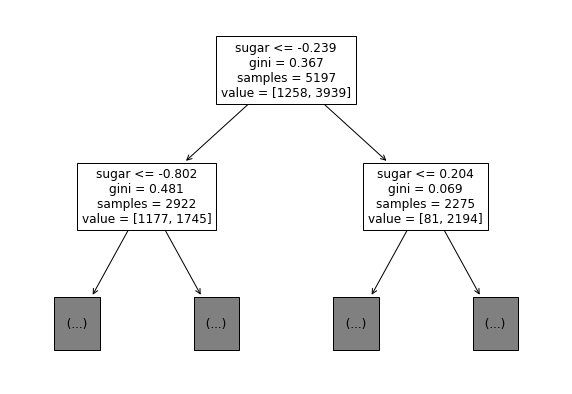

In [3]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, feature_names=['alcohol','sugar','pH'])
plt.show()

#**정리 - 불순도**
 - 트리 노드중에 **gini** - 지니 불순도 의미
 - DecisionTreeClassifier 클래스 **crierion** 매개변수 기본값 : gini
 - criterion매개변수 : 노드에서 데이터를 분할하는 기준을 정함 
 - 지니 불순도 : 1-(음성클래스비율$^2$ + 양성 클래스 비율$^2$)
 

#**정리 - 가지치기**
 - 트리 가지가 너무 많음 + 끝까지 자람
 - 가지를 잘라야 한다 ==> 트리의 최대깊이를 지정 **max_depth** 매개변수
 


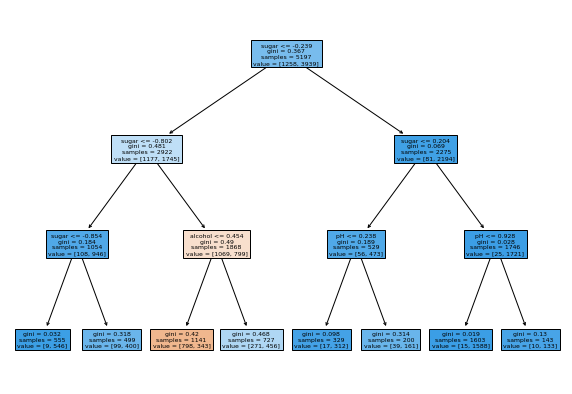

In [4]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_scaled,train_target)
dt.score(train_scaled,train_target) #0.8454877814123533
dt.score(test_scaled,test_target) #0.8415384615384616

plt.figure(figsize=(10,7))
plot_tree(dt,filled= True, feature_names=['alcohol','sugar','pH'])
plt.show()

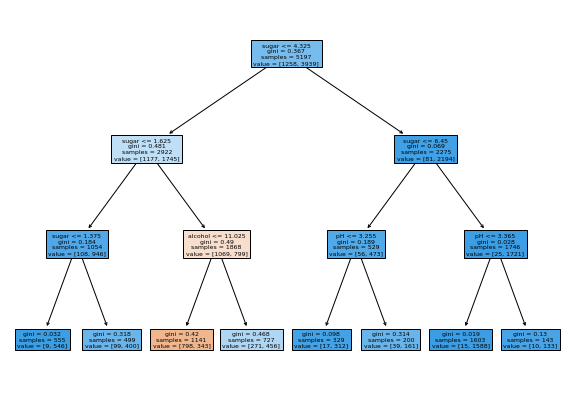

In [5]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input,train_target)
dt.score(train_input,train_target) #0.8454877814123533
dt.score(test_input,test_target) #0.8415384615384616

plt.figure(figsize = (10,7))
plot_tree(dt,filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

#**정리 - 정규화??**
 - 결정트리 - 스케일 아무런 영향을 미치지 않는다 => 표준화 전처리를 할 필요가 없다.
 

#**05-2 교차검증과 그리드 서치**
 - max_depth 다른값하면 성능이 달라진다
 - 모델을 많이 만들어서 테스트 세트로 평가 => 테스트 세트에 잘 맞는 모델이 만들어진다.
 - 테스트 세트로 일반화 성능 올바르게 예측하여면 테스트세트 사용X
 - 모델을 만들고 마지막에 딱 한 번 사용하는 것이 좋다.

#**정리 - 검증세트**
 - 기존 데이터 분할 => 훈련 8 : 테스트 2
 - 검증세트 분할  => 훈련 6 : 검증 2 : 테스트 2
 
 ![이미지](https://img.hankyung.com/photo/202012/d06154ffe1ffdb9a65b61bfdd657d562.jpg)

In [6]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target,random_state = 42, test_size=0.2
)
sub_input,val_input,sub_target,val_target = train_test_split(
    train_input,train_target,test_size = 0.2, random_state = 42
)

sub_input.shape #(4157, 3)
val_input.shape #(1040, 3)
test_input.shape #(1300,3)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(sub_input,sub_target)
dt.score(sub_input,sub_target) #0.9971133028626413
dt.score(val_input,val_target) #0.8653846153846154

0.8663461538461539

#**정리 - 교차검증**
 - 교차검증 : 검증 세트를 떼어 내어 평가하는 과정을 여러 번 반복
 - K-폴드 교차 검증(3개로 나누면 3-폴드 교차검증)
![이미지](https://blog.kakaocdn.net/dn/caM9Yt/btqVOsIyV9o/Cnu2KjGWZzKfK2Mm6lf7Mk/img.png)

# **정보**
 - **cross_validate** : 기본적으로 5-폴드 교차 검증 수행 + 훈련 세트를 섞어 폴드를 나누지 않는다.
 - cross_validate(cv=분할기)로 폴드 수를 바꿀 수도 있다.
 - sklearn.model_selection클래스 내 **StratifiedKFolder**함수
 - **StratifiedKFold**(n_splits=10,shuffle=True,random_state=42)
  - n_splits : 몇 폴드 교차검증을 할지 결정
  - shuffle : 섞을께~ (default - False)

In [7]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt,train_input, train_target)
scores 
#{'fit_time': array([0.01268148, 0.01716113, 0.01386905, 0.01737714, 0.01685452]),
#  'score_time': array([0.01594138, 0.01223731, 0.00155401, 0.00144219, 0.00671983]),
#  'test_score': array([0.86538462, 0.85096154, 0.87391723, 0.85081809, 0.84023099])}

import numpy as np
np.mean(scores['test_score']) #테스트 평균점수 0.855300769971126

from sklearn.model_selection import StratifiedKFold
score = cross_validate(dt,train_input,train_target)
np.mean(score['test_score']) #0.8554908565928778

#10-폴드 교차 검증
splitter = StratifiedKFold(n_splits = 10,shuffle=True,random_state = 42)
score = cross_validate(dt,train_input,train_target,cv=splitter)
np.mean(score['test_score']) #0.8583807618200682

0.8564580554320438

#**정리 - 하이퍼파라미터 튜닝**
 - **모델 파라미터** : 머신러닝 모델이 학습하는 파라미터
 - **하이퍼파라미터** : 모델이 학습할 수 없어 사용자가 지정해야만 하는 파라미터
 - Auto ML : 하이퍼파라미터를 튜닝을 자동으로 수행하는 기술
 - max_depth와 min_sample_split관계
  - max_depth의 최적값은 min_sample_split 매개변수의 값이 바뀌면 함께 달라진다.
 - **GridSearchCV** : 하이퍼파라미터 탐색과 교차검증을 한 번에 수행
  - cross_validate() 함수를 호출활 필요가 없다
  


In [8]:
from sklearn.model_selection import GridSearchCV
#탐색할 매개변수와 탐색할 값의 리스트를 딕셔너리로 만든다
params = {'min_impurity_decrease' : [0.0001,0.0002,0.0003,0.0004,0.0005] }
gs = GridSearchCV(DecisionTreeClassifier(random_state=42) ,params , n_jobs=-1 )
#GirdSearchCV의 cv매개변수 디폴트 5 : min_impurity_decrease총 5번 실행하므로 (5 X 5 = 25번 실행)
gs.fit(train_input,train_target)

#점수가 가장 높은 모델 => gs객체의 best_estimator_ 속성에 저장되어있다.
dt = gs.best_estimator_
dt.score(train_input,train_target) #0.9615162593804117

#그리드서치로 찾은 최적의 매개변수 => best_params_ 속성에 저장
gs.best_params_ #{'min_impurity_decrease': 0.0001}

#교차검증의 평균점수 -> cv_result_속성['mean_test_score']키에 저장되어있다.
gs.cv_results_['mean_test_score'] #[0.86819297, 0.86453617, 0.86492226, 0.86780891, 0.86761605]

array([0.86819297, 0.86453617, 0.86492226, 0.86780891, 0.86761605])

#**정리 - GridSearchCV과정**
 1. 탐색할 매개변수를 지정한다
 2. 훈련세트에서 그리드 서치를 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾는다.
    <br/> ⇒ 이 조합은 그리드 서치 객체에 저장 ( **gs.best_params_**) 
 3. 그리드 서치는 최상의 매개변수에서 전체 훈련 세트를 사용해 최종 모델을 훈련
   <br/> ⇒ 이 모델은 그리드 서치 객체에 저장된다. (**dt.best_estimator_**)

In [9]:
params = {'min_impurity_decrease' : np.arange(0.0001,0.001,0.0001),
          'max_depth': range(5,20,1),
          'min_samples_split' : range(2,100,10)
          }
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),params,n_jobs=-1)
gs.fit(train_input,train_target)
gs.best_params_ # {'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}
np.max(gs.cv_results_['mean_test_score']) #0.8683865773302731

0.8683865773302731

#**정리 - 랜덤서치**
 - 매개변수의 값이 수치일 때 값의 범위나 간격을 미리 정하기 어렵다
 - 너무 많은 매개변수 조건이 있어 그리드 서치 수행 시간이 오래 걸릴수 도 있다.
 - **랜덤서치** : 매개변수 값의 목록을 전달하는 것이 아니라  <br/>
   　　　　　매개변수를 샘플링할 수 있는 확률분포를 전달

In [10]:
from scipy.stats import uniform,randint
rgen = randint(0,10)
np.unique(rgen.rvs(1000),return_counts=True)
#     (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
#     array([ 95,  93, 103,  94, 111,  90, 110,  88, 113, 103]))

ugen = uniform(0,1)
ugen.rvs(10)
#       [0.1602231 , 0.43505251, 0.33834108, 0.28122033, 0.7626123 ,
#        0.75827452, 0.21498013, 0.1360144 , 0.46636865, 0.27530514]

array([0.1877197 , 0.45622806, 0.54037121, 0.70717381, 0.85434784,
       0.26711224, 0.51408531, 0.50805158, 0.41238846, 0.36755169])

In [11]:
#params에 min_samples_leaf 매개변수 추가
params = {'min_impurity_decrease' : uniform(0.001,0.001),
          'max_depth' : randint(20,50),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1,25)
         }
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),params,
                        n_iter = 100, n_jobs = -1,random_state = 42 )
gs.fit(train_input,train_target)
gs.best_params_
#      {'max_depth': 45,
#      'min_impurity_decrease': 0.001025419126744095,
#      'min_samples_leaf': 13,
#      'min_samples_split': 20}
np.max(gs.cv_results_['mean_test_score'])  #0.8647301399274451

dt=gs.best_estimator_
dt.score(test_input,test_target) #0.8561538461538462

0.8561538461538462

#**05-3 트리의 앙상블**
- 정형 데이터 : 데이터들이 어떤 구조로 되어 있는 경우(csv파일 등)
- 비정형 데이터 : 정형 데이터의 반대 (쇼핑몰에 진열된 상품, 쇼핑정보 등)
- **앙상블 학습** : 여러개 분류기 생성, 예측들을 결합하여 더 정확한 예측을 도출
 <br/>ㅤㅤㅤㅤㅤㅤ정형데이터 다루는데 가장 뛰어난 성과 (비정형 - 신경망)
 <br/>ㅤㅤㅤㅤㅤㅤ대부분 결정 트리를 기반으로 만들어짐
- **랜덤포레스트** :  결정 트리를 랜덤하게 만들어 숲 만든다. 
 <br/>ㅤㅤㅤㅤㅤㅤㅤ각 결정트리의 예측을 사용해 최종 예측을 만든다.
- **부트스트랩** : 데이터 세트에서 중복을 허용하여 데이터를 샘플링하는 방식
- 부트스트랩 샘플 : 중복을 허용한 데이터들이 있는 샘플

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input,test_input,train_target,test_target = train_test_split(
    data,target, test_size=0.2 ,random_state=42 )

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1,random_state = 42)

scores = cross_validate(rf, data,target, return_train_score = True, n_jobs=-1)
np.mean(scores['train_score']) #0.9972679357515505
np.mean(scores['test_score']) #0.8545522591342453
#과대적합인가?

#랜덤포레스트 = 결정트리의 앙상블 DecisionTreeClassifier의 매개변수 모두 사용가능
#criterion, max_depth, max_features, min_samples_split, min_impurity_decrease, min_sample_leaf
#랜덤포레스트의 특성 중요도 = 각 결정트리의 특성 중요도를 취합한것

rf.fit(data,target)
rf.feature_importances_ #[0.23123302, 0.50022721, 0.26853978]

#OOB(Out of bag)샘플 - 부트스트랩 샘플에 포함되지 않고 남는 샘플
rf = RandomForestClassifier(oob_score=True,n_jobs = -1,  random_state = 42)
rf.fit(train_input,train_target)
rf.oob_score_ #0.8934000384837406



0.8934000384837406

#**정리 - 엑스트라 트리**
 - **랜덤포레스트(rf)**와 비슷하게 동작, 기본적으로 100개의 결정트리
 - rf와 비슷하게 대부분의 매개변수 지원
 - 일부 특성을 랜덤하게 선택하여 노드를 분할하는 데 사용
 - **엑스트라 트리** & **랜덤포레스트** 차이점?
  - 부트스트랩 샘플을 사용하는지 안하는지 → 각 결정트리 만들때 전체 훈련세트
 - **DecisionTreeClassifier**의 spliter매개변수 'random'
<br/> → 엑스트라 트리가 사용하는 결정트리

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et,train_input,train_target,n_jobs=-1, return_train_score=True)

np.mean(scores['train_score']) #0.9972679357515505
np.mean(scores['test_score']) #0.8887848893166506

et.fit(train_input,train_target)
et.feature_importances_ #[0.20183568, 0.52242907, 0.27573525]

array([0.20183568, 0.52242907, 0.27573525])

#**정리 - 그래디언트 부스팅**
 - 그래디언트 부스팅 : 길이가 얖은 결정트리를 사용하여 이전 트리의 오차를 보완
  - 경사하강법을 사용하여 트리를 앙상블에 추가한다.
  - GradientBoostingClassifier - 기본적으로 깊이가 3인 100개의 결정트리 사용
  - 분류 : 로지스틱 손실 함수
  - 회귀 : 평균 제곱 오차 함수

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb,train_input,train_target,return_train_score = True, n_jobs=-1)
np.mean(scores['train_score']) #0.8881086892152563
np.mean(scores['test_score']) #0.8720430147331015
#과대적합이 거의 X - 결정트리의 개수를 늘려도 과대적합에 매우 강하다
#학습률을 증가시키고 트리의 개수를 늘리면 성능이 향상될 수 있음

gb = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.2, random_state = 42)
scores = cross_validate(gb,train_input,train_target,return_train_score=True,n_jobs=-1)
np.mean(scores['train_score']) # 0.9464595437171814
np.mean(scores['test_score']) # 0.8780082549788999
#결정트리 개수 500개로 5배 늘렸지만 과대적합 잘 억제중

gb.fit(train_input,train_target)
gb.feature_importances_
#[0.15872278, 0.68010884, 0.16116839] ==> 당도에 더 집중하는 구나

array([0.15872278, 0.68010884, 0.16116839])

#**정리 - 히스토그램 기반 그레디언트 부스팅**
 - 히스토그램 기반 그레디언트 부스팅 : 특성을 256개 구간으로 나눈다. 
 - 256개 구간중 하나를 떼어놓고 누락된 값을 위해서 사용한다

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)

np.mean(scores['train_score']) # 0.9321723946453317
np.mean(scores['test_score']) # 0.8801241948619236
#과대적합을 잘 억제하면서 그레디언트 부스팅보다 조금 더 높은 성능을 제공

from sklearn.inspection import permutation_importance

hgb.fit(train_input,train_target)
result = permutation_importance(hgb,train_input,train_target,random_state=42,n_jobs=-1,n_repeats=10)
#훈련세트 특성 중요도
result.importances_mean #[0.08876275, 0.23438522, 0.08027708] ==> 당도에 집중하고 있구나

result = permutation_importance(hgb,test_input,test_target,random_state=42,n_jobs=-1,n_repeats=10)\
#테스트세트 특성 중요도
result.importances_mean #[0.05969231, 0.20238462, 0.049] ==> 조금더 당도에 집중하고 있구나

hgb.score(test_input,test_target) #0.8723076923076923

In [32]:
#XGBoost 가보자 가보자
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method = 'hist',random_state=42)
scores = cross_validate(xgb,train_input,train_target,return_train_score=True)
np.mean(scores['train_score'])   #0.8824322471423747
np.mean(scores['test_score'])    #0.8726214185237284

#LightGBM 가보자 가보자
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb,train_input,train_target,return_train_score=True,n_jobs=-1)
np.mean(scores['train_score']) #0.9338079582727165
np.mean(scores['test_score']) #0.8789710890649293

0.8789710890649293